In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
(X_train , y_train),(X_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step 


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [17]:
y_train.shape

(50000, 1)

In [26]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

* convert into 1 D array *

In [27]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [28]:
classes = ['airplane' , 'automobiles' , 'bird' , 'cat' , 'deer' ,'dog' ,'frog' ,'horse','ship','truck']

In [29]:
classes[3]

'cat'

In [30]:
def plot_sample(X , y ,index):
        plt.figure(figsize = (10,1))
        plt.imshow(X[index])
        plt.xlabel(classes[y[index]])

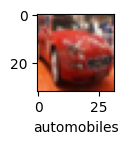

In [32]:
plot_sample(X_train , y_train , 5)

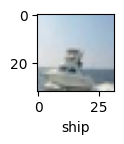

In [33]:
plot_sample(X_train , y_train , 100)

In [34]:
X_train = X_train /255
X_test = X_test /255

In [38]:
ann = models.Sequential([
      layers.Flatten(input_shape = (32,32,3)),
      layers.Dense(3000 ,activation = 'relu'),
      layers.Dense(1000 ,activation = 'relu'),
      layers.Dense(10 ,activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train , y_train, epochs = 5)

C:\Users\adars\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3043 - loss: 1.9244
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4195 - loss: 1.6419
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4531 - loss: 1.5518
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4761 - loss: 1.4895
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4974 - loss: 1.4352


In [40]:
ann.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4010 - loss: 1.7540 


[1.749991774559021, 0.4009000062942505]

In [41]:
from sklearn.metrics import confusion_matrix , classification_report

In [42]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification report : \n" , classification_report(y_test ,  y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.65      0.48      1000
           1       0.31      0.87      0.45      1000
           2       0.45      0.07      0.12      1000
           3       0.47      0.07      0.11      1000
           4       0.36      0.44      0.40      1000
           5       0.44      0.26      0.33      1000
           6       0.72      0.20      0.31      1000
           7       0.43      0.58      0.49      1000
           8       0.49      0.64      0.56      1000
           9       0.53      0.24      0.33      1000

    accuracy                           0.40     10000
   macro avg       0.46      0.40      0.36     10000
weighted avg       0.46      0.40      0.36     10000



# By the help of CNN we can improve our F! score 

In [46]:
cnn = models.Sequential([
     #cnn
        layers.Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu' ),
        layers.MaxPooling2D((2,2)),
    

      #dense
          layers.Flatten(),
          layers.Dense(64 ,activation = 'relu'),
          layers.Dense(10 ,activation = 'softmax')
        
])
cnn.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])
cnn.fit(X_train , y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3852 - loss: 1.6908 
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6037 - loss: 1.1223 
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6604 - loss: 0.9700
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6973 - loss: 0.8730 
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7202 - loss: 0.8010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7394 - loss: 0.7491
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7651 - loss: 0.6812
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7782 - loss: 0.6419 
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7913 - loss: 0.5970
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8091 - loss: 0.5547


In [47]:
cnn.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7059 - loss: 0.9082


[0.9218543171882629, 0.7045000195503235]

In [48]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [49]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

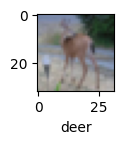

In [50]:
plot_sample(X_test , y_test , 100)

In [52]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[8.77134808e-05, 3.79845665e-06, 3.91475204e-03, 9.76361275e-01,
        3.51962262e-05, 5.53483749e-03, 2.34048511e-03, 1.29158361e-04,
        1.15823261e-02, 1.04879546e-05],
       [2.51881225e-04, 2.20346861e-04, 6.69912410e-08, 1.38881440e-08,
        2.52299737e-10, 6.37453290e-09, 4.41130743e-10, 5.44360401e-13,
        9.99526620e-01, 1.04000128e-06],
       [1.86740294e-01, 2.98032854e-02, 2.74095801e-03, 1.77211140e-03,
        3.95295589e-04, 1.65004353e-03, 5.89302472e-05, 1.20667904e-03,
        7.72466540e-01, 3.16586974e-03],
       [9.76658285e-01, 6.92135382e-06, 3.04260757e-04, 3.23613858e-05,
        3.42161320e-06, 3.34121364e-06, 7.04650620e-06, 2.93402309e-07,
        2.29822788e-02, 1.78975722e-06],
       [5.35527079e-06, 2.71150693e-05, 9.57778562e-03, 4.02099341e-02,
        2.46053472e-01, 1.05511711e-03, 7.03049242e-01, 3.51695940e-06,
        1.83212687e-05, 1.13491495e-07]], dtype=float32)

In [55]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(0),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(4),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(9),
 np.int64(6),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(6)]

In [56]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

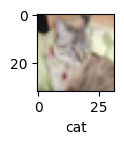

In [76]:
plot_sample(X_test , y_test , 8)

In [77]:
classes[y_classes[8]]
#15 

'cat'

# Classification Report 

In [70]:
print("Classification report : \n" , classification_report(y_test ,  y_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.86      0.77      0.81      1000
           2       0.63      0.57      0.60      1000
           3       0.51      0.49      0.50      1000
           4       0.62      0.72      0.66      1000
           5       0.59      0.64      0.62      1000
           6       0.81      0.75      0.78      1000
           7       0.73      0.73      0.73      1000
           8       0.78      0.82      0.80      1000
           9       0.82      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.71     10000
weighted avg       0.71      0.70      0.71     10000

